In [193]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter


In [194]:
a_digit_10MHz=0.54
a_digit_15MHz=0.415
a_digit_20MHz=0.326
a_digit_30MHz=0.228

ratio_analog=1000
a_analog_10MHz=0.99937 # only correct if ratio_analog=1000
a_analog_20MHz=0.99874 # only correct if ratio_analog=1000
a_analog_30MHz=0.99812 # only correct if ratio_analog=1000
a_analog_50MHz=0.99686 # only correct if ratio_analog=1000
a_analog_70MHz=0.99560 # only correct if ratio_analog=1000


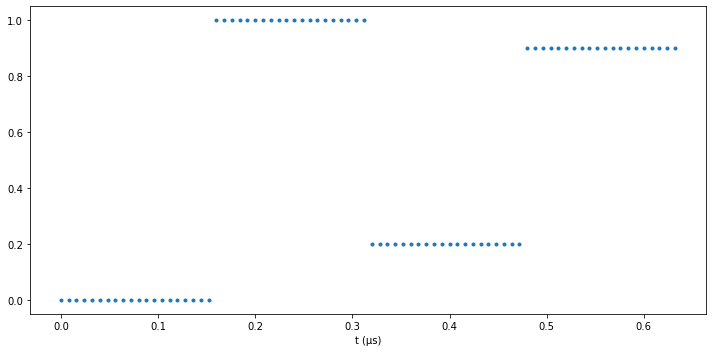

In [195]:
fs=125e6 # DAC sampling frequency
f_ratio=20  # Ratio between sampling frequency and frow
frow=fs/f_ratio
Nrows=4
sig=np.zeros(f_ratio*Nrows)
t=np.arange(f_ratio*Nrows)/(f_ratio*frow)
sig[0:f_ratio*1]=0*np.ones(f_ratio)
sig[f_ratio*1:f_ratio*2]=1.0*np.ones(f_ratio)
sig[f_ratio*2:f_ratio*3]=0.2*np.ones(f_ratio)
sig[f_ratio*3:f_ratio*4]=0.9*np.ones(f_ratio)


fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(t*1e6,sig,'.')
ax.set_xlabel('t (µs)')
fig.tight_layout()


In [196]:
def apply_filter(sig, a):
    return(lfilter([1],[1, -a], sig)*(1-a))

In [197]:
def switch2analog(sig, ratio_analog=1000):
    """
    This function fakes a perfect digital to analogue convertion 
    by oversampling input values.
    """
    sig_analog=np.zeros(len(sig)*ratio_analog)
    for i in range(len(sig)):
        sig_analog[i*ratio_analog:(i+1)*ratio_analog]=sig[i]
    return(sig_analog)

In [198]:
def compare_plot(sig, a_dig1, a_dig2, text1='', text2=''):
    t_analog=np.arange(f_ratio*Nrows*ratio_analog)/(f_ratio*ratio_analog*frow)
    sig_analog=switch2analog(sig,ratio_analog)
    sig1_analog=switch2analog(apply_filter(sig,a_dig1))
    sig2_analog=switch2analog(apply_filter(sig,a_dig2))

    xmini, xmaxi=0.18, 0.30
    ymini, ymaxi=-0.1, 1.1
    grid_x_ticks = np.arange(xmini, xmaxi, 0.01)
    
    fig=plt.figure(figsize=(14,14))

    # applying analog filter
    sig_analog_filt_10MHz=apply_filter(sig_analog, a_analog_10MHz)
    
    ax1=fig.add_subplot(3,2,1)
    ax1.plot([xmini,xmini],[ymini, ymaxi], '-k', linewidth=2)
    ax1.plot([xmaxi,xmaxi],[ymini, ymaxi], '-k', linewidth=2)
    ax1.plot([xmini,xmaxi],[ymini, ymini], '-k', linewidth=2)
    ax1.plot([xmini,xmaxi],[ymaxi, ymaxi], '-k', linewidth=2)

    sig1_analog_filt_10MHz=apply_filter(sig1_analog, a_analog_10MHz)
    sig1_analog_filt_20MHz=apply_filter(sig1_analog, a_analog_20MHz)
    sig1_analog_filt_30MHz=apply_filter(sig1_analog, a_analog_30MHz)
    sig1_analog_filt_50MHz=apply_filter(sig1_analog, a_analog_50MHz)

    ax1.plot(t_analog*1e6, sig_analog, label='Square')
    ax1.plot(t_analog*1e6, sig1_analog, label='Square+digital LPF '+text1)
    ax1.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    ax1.plot(t_analog*1e6, sig1_analog_filt_10MHz, color='r', label='Square+digital LPF '+text1+'+analog LPF @ 10MHz')
    ax1.plot(t_analog*1e6, sig1_analog_filt_20MHz, label='Square+digital LPF '+text1+'+analog LPF @ 20MHz')
    ax1.plot(t_analog*1e6, sig1_analog_filt_30MHz, color='blue', label='Square+digital LPF'+text1+'+analog LPF @ 30MHz')
    ax1.plot(t_analog*1e6, sig1_analog_filt_50MHz, label='Square+digital LPF'+text1+'+analog LPF @ 50MHz')
    ax1.legend(loc='best')
    ax1.set_xlabel('t (µs)')
    ax1.set_xlim([0.15, 0.55])
    ax1.set_ylim([ymini, ymaxi])
    ax1.grid(color='k', linestyle=':', linewidth=0.5)

    ax2=fig.add_subplot(3,2,3)
    ax2.plot(t_analog*1e6, sig_analog, label='Square')
    ax2.plot(t_analog*1e6, sig1_analog, label='Square+digital LPF '+text1)
    ax2.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    ax2.plot(t_analog*1e6, sig1_analog_filt_10MHz, color='r', label='Square+digital LPF '+text1+'+analog LPF @ 10MHz')
    ax2.plot(t_analog*1e6, sig1_analog_filt_20MHz, label='Square+digital LPF '+text1+'+analog LPF @ 20MHz')
    ax2.plot(t_analog*1e6, sig1_analog_filt_30MHz, color='blue', label='Square+digital LPF '+text1+'+analog LPF @ 30MHz')
    ax2.plot(t_analog*1e6, sig1_analog_filt_50MHz, label='Square+digital LPF '+text1+'+analog LPF @ 50MHz')
    ax2.legend(loc='best')
    ax2.set_xlabel('t (µs)')
    ax2.set_xlim([xmini, xmaxi])
    ax2.set_xticks(grid_x_ticks, minor=True)
    ax2.grid(which='both', alpha=0.8, linestyle='--')


    ax3=fig.add_subplot(3,2,2)
    ax3.plot([xmini,xmini],[ymini, ymaxi], '-k', linewidth=2)
    ax3.plot([xmaxi,xmaxi],[ymini, ymaxi], '-k', linewidth=2)
    ax3.plot([xmini,xmaxi],[ymini, ymini], '-k', linewidth=2)
    ax3.plot([xmini,xmaxi],[ymaxi, ymaxi], '-k', linewidth=2)

    sig2_analog_filt_10MHz=apply_filter(sig2_analog, a_analog_10MHz)
    sig2_analog_filt_20MHz=apply_filter(sig2_analog, a_analog_20MHz)
    sig2_analog_filt_30MHz=apply_filter(sig2_analog, a_analog_30MHz)
    sig2_analog_filt_50MHz=apply_filter(sig2_analog, a_analog_50MHz)

    ax3.plot(t_analog*1e6, sig_analog, label='Square')
    ax3.plot(t_analog*1e6, sig2_analog, label='Square+digital LPF '+text2)
    ax3.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_10MHz, color='r', label='Square+digital LPF '+text2+'+analog LPF @ 10MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_20MHz, label='Square+digital LPF '+text2+'+analog LPF @ 20MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_30MHz, color='blue', label='Square+digital LPF '+text2+'+analog LPF @ 30MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_50MHz, label='Square+digital LPF '+text2+'+analog LPF @ 50MHz')
    ax3.legend(loc='best')
    ax3.set_xlabel('t (µs)')
    ax3.set_xlim([0.15, 0.55])
    ax3.set_ylim([ymini, ymaxi])
    ax3.grid(color='k', linestyle=':', linewidth=0.5)


    ax4=fig.add_subplot(3,2,4)
    ax4.plot(t_analog*1e6, sig_analog, label='Square')
    ax4.plot(t_analog*1e6, sig2_analog, label='Square+digital LPF '+text2)
    ax4.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    ax4.plot(t_analog*1e6, sig2_analog_filt_10MHz, color='r', label='Square+digital LPF '+text2+'+analog LPF @ 10MHz')
    ax4.plot(t_analog*1e6, sig2_analog_filt_20MHz, label='Square+digital LPF '+text2+'+analog LPF @ 20MHz')
    ax4.plot(t_analog*1e6, sig2_analog_filt_30MHz, color='blue', label='Square+digital LPF '+text2+'+analog LPF @ 30MHz')
    ax4.plot(t_analog*1e6, sig2_analog_filt_50MHz, label='Square+digital LPF '+text2+'+analog LPF @ 50MHz')
    ax4.legend(loc='best')
    ax4.set_xlabel('t (µs)')
    ax4.set_xlim([xmini, xmaxi])
    ax4.set_xticks(grid_x_ticks, minor=True)
    ax4.grid(which='both', alpha=0.8, linestyle='--')


    ax5=fig.add_subplot(3,2,5)
    ax5.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    ax5.plot(t_analog*1e6, sig1_analog_filt_10MHz,':', color='r', label='Square+digital LPF '+text1+'+analog LPF @ 10MHz')
    ax5.plot(t_analog*1e6, sig2_analog_filt_10MHz, color='r', label='Square+digital LPF '+text2+'+analog LPF @ 10MHz')
    ax5.legend(loc='best')
    ax5.set_xlabel('t (µs)')
    ax5.set_xlim([xmini, xmaxi])
    ax5.set_xticks(grid_x_ticks, minor=True)
    ax5.grid(which='both', alpha=0.8, linestyle='--')
    
    ax6=fig.add_subplot(3,2,6)
    ax6.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    ax6.plot(t_analog*1e6, sig1_analog_filt_30MHz,':', color='blue', label='Square+digital LPF '+text1+'+analog LPF @ 30MHz')
    ax6.plot(t_analog*1e6, sig2_analog_filt_30MHz, color='blue', label='Square+digital LPF '+text2+'+analog LPF @ 30MHz')
    ax6.legend(loc='best')
    ax6.set_xlabel('t (µs)')
    ax6.set_xlim([xmini, xmaxi])
    ax6.set_xticks(grid_x_ticks, minor=True)
    ax6.grid(which='both', alpha=0.8, linestyle='--')

    fig.tight_layout()
    plt.savefig('pulse_shaping_tests.jpg', dpi=120, bbox_inches='tight')


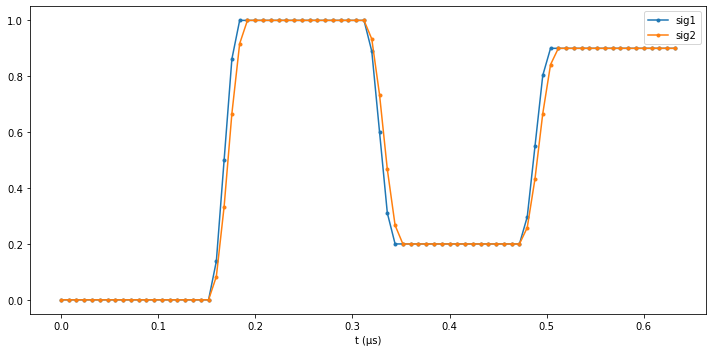

In [199]:
from scipy.ndimage.interpolation import shift

ntaps1=6
r_shift1=1
sig1=shift(np.convolve(sig,np.hanning(ntaps1), mode='same')/np.sum(np.hanning(ntaps1)), r_shift1, cval=0)

ntaps2=7
r_shift2=2
sig2=shift(np.convolve(sig,np.hanning(ntaps2), mode='same')/np.sum(np.hanning(ntaps2)), r_shift2, cval=0)


fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(t*1e6, sig1, marker='.', label='sig1')
ax.plot(t*1e6, sig2, marker='.', label='sig2')
ax.legend(loc='best')
ax.set_xlabel('t (µs)')
fig.tight_layout()


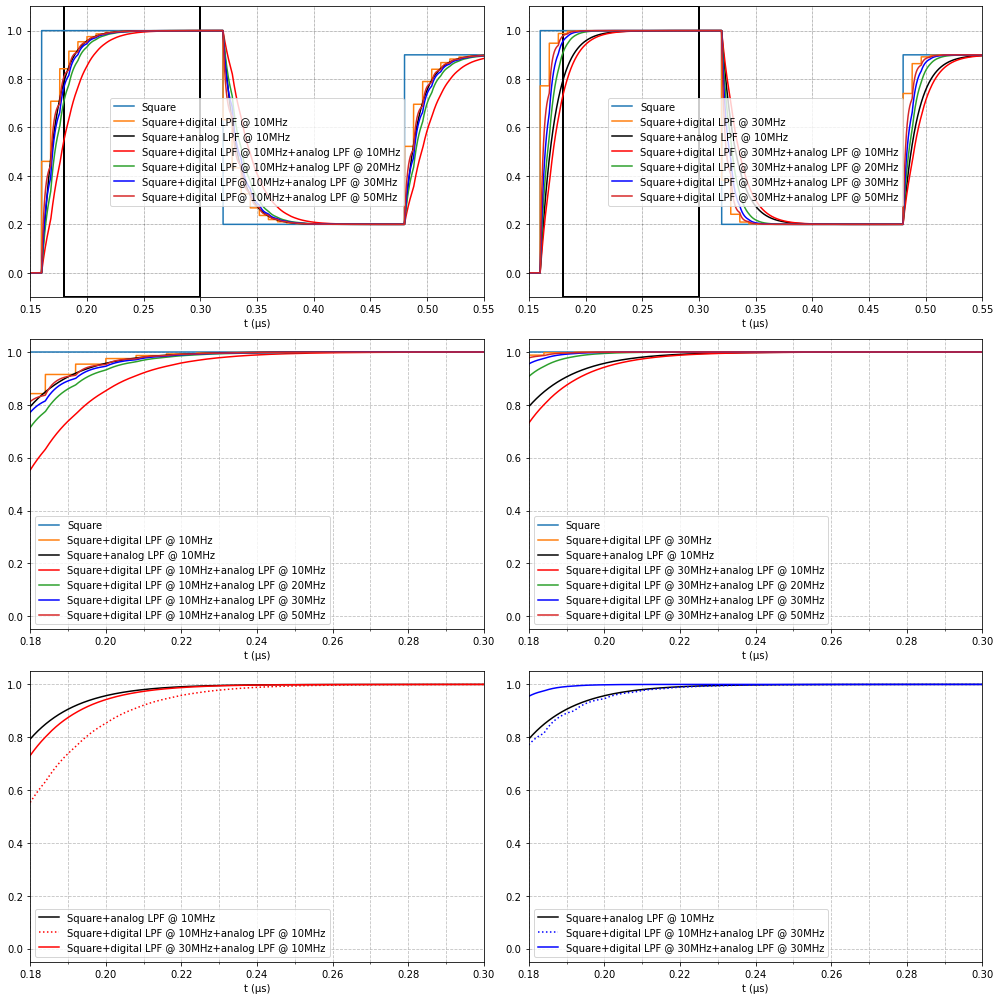

In [200]:
compare_plot(sig, a_digit_10MHz, a_digit_30MHz, '@ 10MHz', '@ 30MHz')

In [224]:
def compare_plot2(sig, a_dig1, a_dig2, text1='', text2=''):
    trow=1e6/frow

    vec_x=np.arange(f_ratio*4)*trow/f_ratio-trow

    t_analog=np.arange(f_ratio*Nrows*ratio_analog)/(f_ratio*ratio_analog*frow)-(trow/1e6)
    sig_analog=switch2analog(sig,ratio_analog)
    sig1_analog=switch2analog(apply_filter(sig,a_dig1))
    sig2_analog=switch2analog(apply_filter(sig,a_dig2))

    xmini, xmaxi=-0.01, 0.07
    ymini, ymaxi=-0.1, 1.1
    grid_x_ticks = np.arange(xmini, xmaxi, 0.01)
    
    fig=plt.figure(figsize=(10,6))

    # applying analog filter
    sig_analog_filt_10MHz=apply_filter(sig_analog, a_analog_10MHz)
    
    ax1=fig.add_subplot(2,1,1)
    ax1.plot([xmini,xmini],[ymini+0.05, ymaxi-0.05], '-k', linewidth=3)
    ax1.plot([xmaxi,xmaxi],[ymini+0.05, ymaxi-0.05], '-k', linewidth=3)
    ax1.plot([xmini,xmaxi],[ymini+0.05, ymini+0.05], '-k', linewidth=3)
    ax1.plot([xmini,xmaxi],[ymaxi-0.05, ymaxi-0.05], '-k', linewidth=3)

    #sig1_analog_filt_10MHz=apply_filter(sig1_analog, a_analog_10MHz)
    sig1_analog_filt_20MHz=apply_filter(sig1_analog, a_analog_20MHz)
    sig1_analog_filt_30MHz=apply_filter(sig1_analog, a_analog_30MHz)
    sig1_analog_filt_50MHz=apply_filter(sig1_analog, a_analog_50MHz)
    sig1_analog_filt_70MHz=apply_filter(sig1_analog, a_analog_70MHz)

    ax1.plot(t_analog*1e6, sig_analog, label='Square')
    ax1.plot(t_analog*1e6, sig1_analog, label='Square + digital shaping')
    ax1.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square + analog LPF @ 10MHz')
   # ax1.plot(t_analog*1e6, sig1_analog_filt_10MHz, color='r', label='Square+digital LPF '+text1+'+analog LPF @ 10MHz')
    #ax1.plot(t_analog*1e6, sig1_analog_filt_20MHz, label='Square+digital LPF '+text1+'+analog LPF @ 20MHz')
    #ax1.plot(t_analog*1e6, sig1_analog_filt_30MHz, color='blue', label='Square+digital LPF'+text1+'+analog LPF @ 30MHz')
    ax1.plot(t_analog*1e6, sig1_analog_filt_50MHz, label='Square + digital shaping + analog LPF @ 50MHz')
    #ax1.plot(t_analog*1e6, sig1_analog_filt_70MHz, label='Square+digital LPF'+text1+'+analog LPF @ 70MHz')

    #ax1.legend(loc='best')
    ax1.set_xlabel('t (µs)')
    ax1.set_ylabel('Volage (AU)')
    ax1.set_xlim([-0.02, 2.2*trow])
    ax1.set_ylim([ymini, ymaxi])
    ax1.grid(color='k', linestyle=':', linewidth=0.5)

    ax2=fig.add_subplot(2,1,2)
    ax2.plot(t_analog*1e6, sig_analog, label='Square')
    ax2.plot(t_analog*1e6, sig1_analog, label='Square + digital shaping')
    ax2.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square + analog LPF @ 10MHz')
    #ax2.plot(t_analog*1e6, sig1_analog_filt_10MHz, color='r', label='Square+digital LPF '+text1+'+analog LPF @ 10MHz')
    #ax2.plot(t_analog*1e6, sig1_analog_filt_20MHz, label='Square+digital LPF '+text1+'+analog LPF @ 20MHz')
    #ax2.plot(t_analog*1e6, sig1_analog_filt_30MHz, color='blue', label='Square+digital LPF '+text1+'+analog LPF @ 30MHz')
    ax2.plot(t_analog*1e6, sig1_analog_filt_50MHz, label='Square + digital shaping + analog LPF @ 50MHz')
    #ax2.plot(t_analog*1e6, sig1_analog_filt_70MHz, label='Square+digital LPF '+text1+'+analog LPF @ 70MHz')

    ax2.legend(loc='best')
    ax2.set_xlabel('t (µs)')
    ax2.set_ylabel('Volage (AU)')
    ax2.set_xlim([xmini, xmaxi])
    ax2.set_xticks(grid_x_ticks, minor=True)
    ax2.grid(which='both', alpha=0.8, linestyle='--')

    fig.tight_layout()
    plt.savefig('pulse_shaping_1.jpg', dpi=120, bbox_inches='tight')


    fig=plt.figure(figsize=(14,8))

    ax3=fig.add_subplot(2,1,1)
    ax3.plot([xmini,xmini],[ymini, ymaxi], '-k', linewidth=2)
    ax3.plot([xmaxi,xmaxi],[ymini, ymaxi], '-k', linewidth=2)
    ax3.plot([xmini,xmaxi],[ymini, ymini], '-k', linewidth=2)
    ax3.plot([xmini,xmaxi],[ymaxi, ymaxi], '-k', linewidth=2)

    sig2_analog_filt_10MHz=apply_filter(sig2_analog, a_analog_10MHz)
    sig2_analog_filt_20MHz=apply_filter(sig2_analog, a_analog_20MHz)
    sig2_analog_filt_30MHz=apply_filter(sig2_analog, a_analog_30MHz)
    sig2_analog_filt_50MHz=apply_filter(sig2_analog, a_analog_50MHz)
    sig2_analog_filt_70MHz=apply_filter(sig2_analog, a_analog_70MHz)


    ax3.plot(t_analog*1e6, sig_analog, label='Square')
    ax3.plot(t_analog*1e6, sig2_analog, label='Square+digital LPF '+text2)
    ax3.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    #ax3.plot(t_analog*1e6, sig2_analog_filt_10MHz, color='r', label='Square+digital LPF '+text2+'+analog LPF @ 10MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_20MHz, label='Square+digital LPF '+text2+'+analog LPF @ 20MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_30MHz, color='blue', label='Square+digital LPF '+text2+'+analog LPF @ 30MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_50MHz, label='Square+digital LPF '+text2+'+analog LPF @ 50MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_70MHz, label='Square+digital LPF '+text2+'+analog LPF @ 70MHz')

    ax3.legend(loc='best')
    ax3.set_xlabel('t (µs)')
    ax3.set_xlim([0.15, 0.55])
    ax3.set_ylim([ymini, ymaxi])
    ax3.grid(color='k', linestyle=':', linewidth=0.5)


    ax4=fig.add_subplot(2,1,2)
    ax4.plot(t_analog*1e6, sig_analog, label='Square')
    ax4.plot(t_analog*1e6, sig2_analog, label='Square+digital LPF '+text2)
    ax4.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    #ax4.plot(t_analog*1e6, sig2_analog_filt_10MHz, color='r', label='Square+digital LPF '+text2+'+analog LPF @ 10MHz')
    ax4.plot(t_analog*1e6, sig2_analog_filt_20MHz, label='Square+digital LPF '+text2+'+analog LPF @ 20MHz')
    ax4.plot(t_analog*1e6, sig2_analog_filt_30MHz, color='blue', label='Square+digital LPF '+text2+'+analog LPF @ 30MHz')
    ax4.plot(t_analog*1e6, sig2_analog_filt_50MHz, label='Square+digital LPF '+text2+'+analog LPF @ 50MHz')
    ax4.plot(t_analog*1e6, sig2_analog_filt_70MHz, label='Square+digital LPF '+text2+'+analog LPF @ 70MHz')

    ax4.legend(loc='best')
    ax4.set_xlabel('t (µs)')
    ax4.set_xlim([xmini, xmaxi])
    ax4.set_xticks(grid_x_ticks, minor=True)
    ax4.grid(which='both', alpha=0.8, linestyle='--')

    fig.tight_layout()
    plt.savefig('pulse_shaping_2.jpg', dpi=120, bbox_inches='tight')

    
    fig=plt.figure(figsize=(14,8))

    ax5=fig.add_subplot(2,1,1)
    ax5.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    ax5.plot(t_analog*1e6, sig1_analog_filt_20MHz,':', color='r', label='Square+digital LPF '+text1+'+analog LPF @ 20MHz')
    ax5.plot(t_analog*1e6, sig2_analog_filt_20MHz, color='r', label='Square+digital LPF '+text2+'+analog LPF @ 20MHz')
    ax5.legend(loc='lower right')
    ax5.set_xlabel('t (µs)')
    ax5.set_xlim([xmini, xmaxi])
    ax5.set_xticks(grid_x_ticks, minor=True)
    ax5.grid(which='both', alpha=0.8, linestyle='--')
    
    ax6=fig.add_subplot(2,1,2)
    ax6.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    ax6.plot(t_analog*1e6, sig1_analog_filt_50MHz,':', color='blue', label='Square+digital LPF '+text1+'+analog LPF @ 50MHz')
    ax6.plot(t_analog*1e6, sig2_analog_filt_50MHz, color='blue', label='Square+digital LPF '+text2+'+analog LPF @ 50MHz')
    ax6.legend(loc='lower right')
    ax6.set_xlabel('t (µs)')
    ax6.set_xlim([xmini, xmaxi])
    ax6.set_xticks(grid_x_ticks, minor=True)
    ax6.grid(which='both', alpha=0.8, linestyle='--')

    fig.tight_layout()
    plt.savefig('pulse_shaping_3.jpg', dpi=120, bbox_inches='tight')


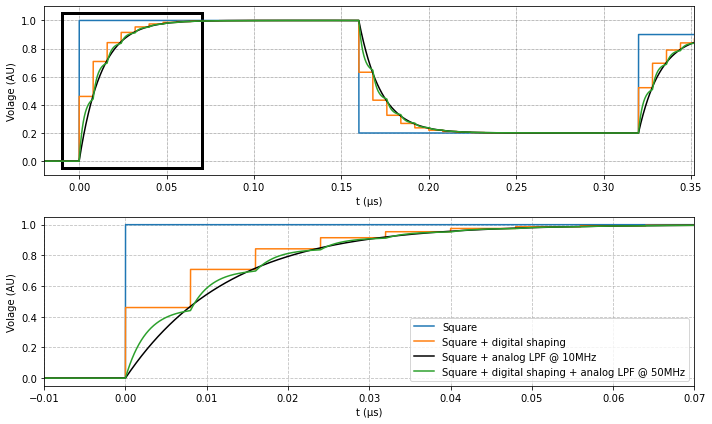

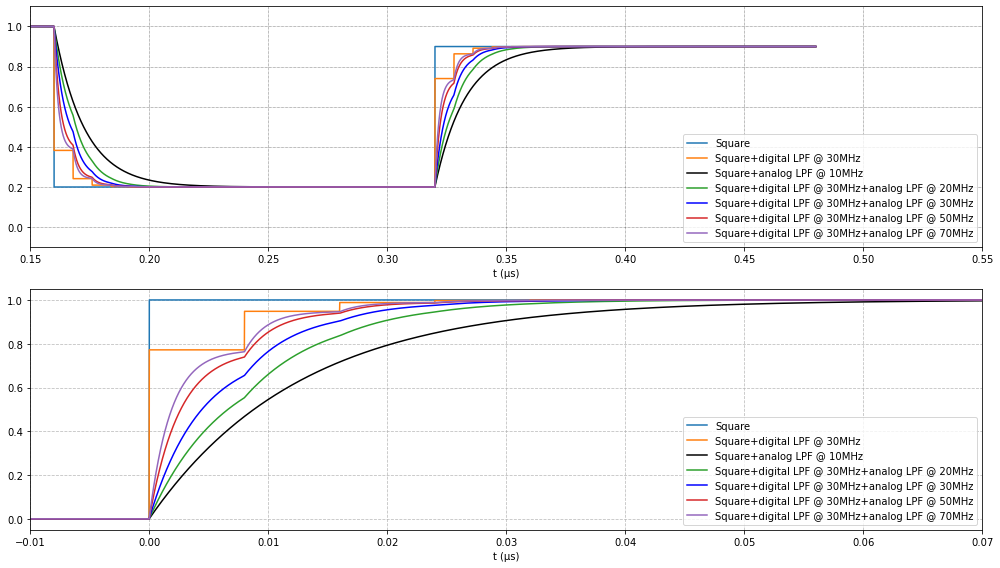

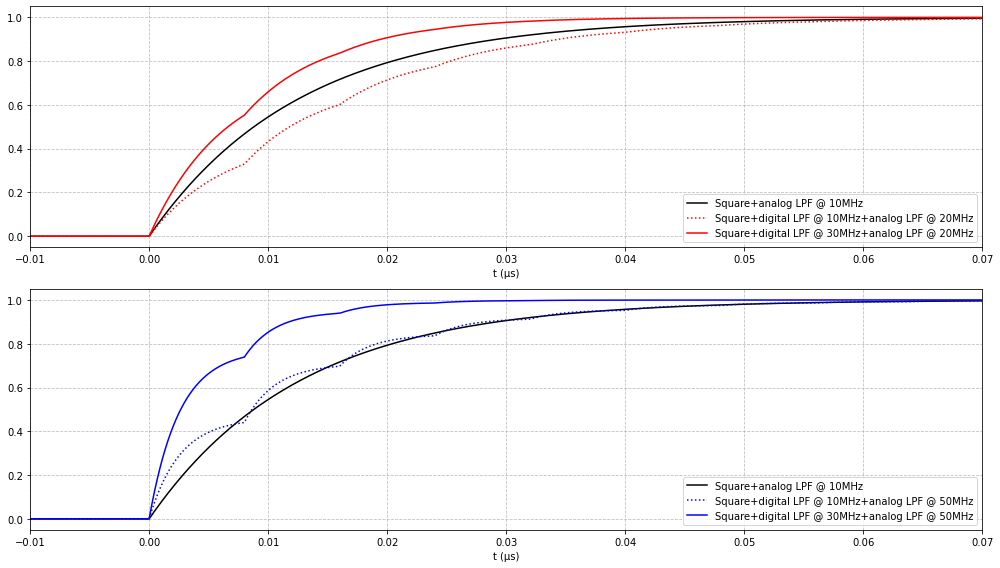

In [225]:
compare_plot2(sig, a_digit_10MHz, a_digit_30MHz, '@ 10MHz', '@ 30MHz')

In [203]:
def dirac(n):
    """ dirac(n):
    Rend une impulsion de Dirac de longueur n """
    d=np.zeros(n)
    d[0]=1
    return d

def freq_analysis(a,Fs,Fmax=50e6,name=''):
    n=10000000
    h=apply_filter(dirac(n),a)

    # Calcul de la réponse en fréquence
    M=1000000
    H=np.fft.fftshift(np.fft.fft(h,M))   # On utilise ffshift pour centrer la représentation sur 0
    H=abs(H[int(M/2):])

    f=np.arange(M/2)/M*Fs
    module_db=20*np.log10(H/H[0])

    fc=f[np.where(module_db <= -3)][0]
    #print("Cutoff frequency: {0:6.3} MHz +/- {1:6.3} kHz".format(fc/1e6, Fs/M/1e3))

    fmini=100e3
    fig=plt.figure(4)   # Et affichage
    plt.semilogx(f, module_db, label=u"cutoff frequency ={0:6.3} MHz".format(fc/1e6))
    plt.plot([fc,fc],[-50,-3],'--', color='k')
    plt.plot([fmini,fc],[-3,-3],'--', color='k')
    plt.xlabel(u"Frequency")
    plt.ylabel(u"Attenuation (dB)")
    plt.title("Frequency response"+name)
    plt.legend(loc="best")
    plt.grid(b=True)
    plt.xlim([fmini, Fmax])
    plt.ylim([-6, 1])
    fig.tight_layout()   # évite le recouvrement des titles et labels


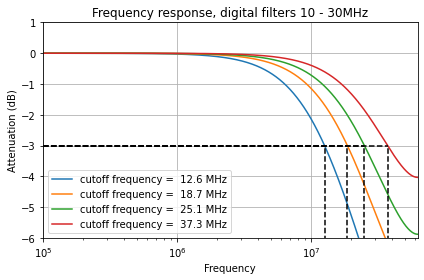

In [204]:
a_digit_10MHz=0.54
a_digit_15MHz=0.415
a_digit_20MHz=0.326
a_digit_30MHz=0.228
freq_analysis(a_digit_10MHz,fs,fs/2)
freq_analysis(a_digit_15MHz,fs,fs/2)
freq_analysis(a_digit_20MHz,fs,fs/2)
freq_analysis(a_digit_30MHz,fs,fs/2, name=', digital filters 10 - 30MHz')

plt.savefig('f_response_digital_filters.jpg', dpi=120, bbox_inches='tight')


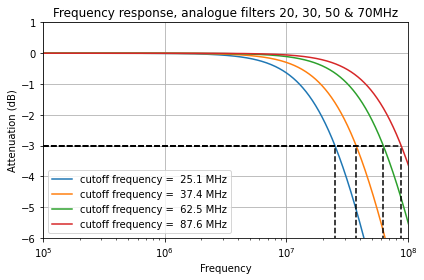

In [205]:
a_analog_10MHz=0.99937
a_analog_20MHz=0.99874
a_analog_30MHz=0.99812
a_analog_50MHz=0.99686
a_analog_70MHz=0.99560

freq_analysis(a_analog_20MHz,fs*ratio_analog,100e6)
freq_analysis(a_analog_30MHz,fs*ratio_analog,100e6)
freq_analysis(a_analog_50MHz,fs*ratio_analog,100e6)
freq_analysis(a_analog_70MHz,fs*ratio_analog,100e6,', analogue filters 20, 30, 50 & 70MHz')

plt.savefig('f_response_analog_filters.jpg', dpi=120, bbox_inches='tight')

In [206]:
def compare_plot2(sig, a_dig1, a_dig2, text1='', text2=''):
    t_analog=np.arange(f_ratio*Nrows*ratio_analog)/(f_ratio*ratio_analog*frow)
    sig_analog=switch2analog(sig,ratio_analog)
    sig1_analog=switch2analog(apply_filter(sig,a_dig1))
    sig2_analog=switch2analog(apply_filter(sig,a_dig2))

    xmini, xmaxi=0.18, 0.30
    ymini, ymaxi=0.99, 1.001
    grid_x_ticks = np.arange(xmini, xmaxi, 0.01)
    
    fig=plt.figure(figsize=(14,6))

    # applying analog filter
    sig_analog_filt_10MHz=apply_filter(sig_analog, a_analog_10MHz)
    
    ax1=fig.add_subplot(2,1,1)

    sig1_analog_filt_10MHz=apply_filter(sig1_analog, a_analog_10MHz)
    sig1_analog_filt_20MHz=apply_filter(sig1_analog, a_analog_20MHz)
    sig1_analog_filt_30MHz=apply_filter(sig1_analog, a_analog_30MHz)
    sig1_analog_filt_50MHz=apply_filter(sig1_analog, a_analog_50MHz)

    ax1.plot(t_analog*1e6, sig_analog, label='Square')
    ax1.plot(t_analog*1e6, sig1_analog, label='Square+digital LPF '+text1)
    ax1.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    ax1.plot(t_analog*1e6, sig1_analog_filt_10MHz, color='r', label='Square+digital LPF '+text1+'+analog LPF @ 10MHz')
    ax1.plot(t_analog*1e6, sig1_analog_filt_20MHz, label='Square+digital LPF '+text1+'+analog LPF @ 20MHz')
    ax1.plot(t_analog*1e6, sig1_analog_filt_30MHz, color='blue', label='Square+digital LPF'+text1+'+analog LPF @ 30MHz')
    ax1.plot(t_analog*1e6, sig1_analog_filt_50MHz, label='Square+digital LPF'+text1+'+analog LPF @ 50MHz')
    ax1.legend(loc='best')
    ax1.set_xlabel('t (µs)')
    ax1.set_xlim([0.15, 0.55])
    ax1.set_ylim([ymini, ymaxi])
    ax1.grid(color='k', linestyle=':', linewidth=0.5)

    ax3=fig.add_subplot(2,1,2)

    sig2_analog_filt_10MHz=apply_filter(sig2_analog, a_analog_10MHz)
    sig2_analog_filt_20MHz=apply_filter(sig2_analog, a_analog_20MHz)
    sig2_analog_filt_30MHz=apply_filter(sig2_analog, a_analog_30MHz)
    sig2_analog_filt_50MHz=apply_filter(sig2_analog, a_analog_50MHz)

    ax3.plot(t_analog*1e6, sig_analog, label='Square')
    ax3.plot(t_analog*1e6, sig2_analog, label='Square+digital LPF '+text2)
    ax3.plot(t_analog*1e6, sig_analog_filt_10MHz, color='k', label='Square+analog LPF @ 10MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_10MHz, color='r', label='Square+digital LPF '+text2+'+analog LPF @ 10MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_20MHz, label='Square+digital LPF '+text2+'+analog LPF @ 20MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_30MHz, color='blue', label='Square+digital LPF '+text2+'+analog LPF @ 30MHz')
    ax3.plot(t_analog*1e6, sig2_analog_filt_50MHz, label='Square+digital LPF '+text2+'+analog LPF @ 50MHz')
    ax3.legend(loc='best')
    ax3.set_xlabel('t (µs)')
    ax3.set_xlim([0.15, 0.55])
    ax3.set_ylim([ymini, ymaxi])
    ax3.grid(color='k', linestyle=':', linewidth=0.5)
    
    fig.tight_layout()   # évite le recouvrement des titles et labels
    
    plt.savefig('pulse_shaping_tests_zoom_plateau.jpg', dpi=120, bbox_inches='tight')



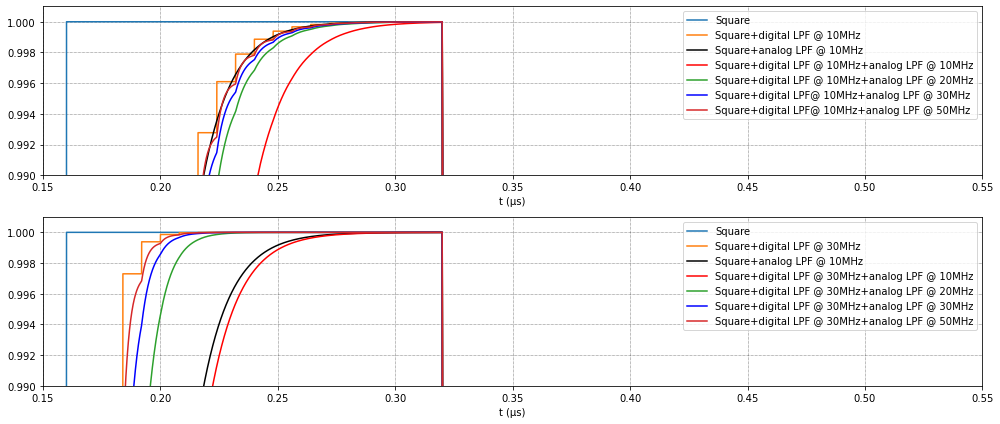

In [207]:
compare_plot2(sig, a_digit_10MHz, a_digit_30MHz, '@ 10MHz', '@ 30MHz')

In [208]:
def compare_plot3(sig, a_ana, a_dig1, a_dig2, a_dig3, a_dig4, texta='', textd1='', textd2='', textd3='', textd4=''):
    t_analog=np.arange(f_ratio*Nrows*ratio_analog)/(f_ratio*ratio_analog*frow)
    """
    This function makes plots to compare the impact of the combination of different digital filters 
    with an analogue filter.
    """

    # Applying digital filters to square signal
    sig_df1=apply_filter(sig,a_dig1)
    sig_df2=apply_filter(sig,a_dig2)
    sig_df3=apply_filter(sig,a_dig3)
    sig_df4=apply_filter(sig,a_dig4)


    # moving to analogue domain (i.e. quasi infinite sampling)
    sig_analog=switch2analog(sig,ratio_analog)
    sig_df1_analog=switch2analog(sig_df1,ratio_analog)
    sig_df2_analog=switch2analog(sig_df2,ratio_analog)
    sig_df3_analog=switch2analog(sig_df3,ratio_analog)
    sig_df4_analog=switch2analog(sig_df4,ratio_analog)


    # Applying analogue filter
    a_analog_10MHz=0.99937
    sig_analog_af=apply_filter(sig_analog,a_analog_10MHz)
    sig_df1_analog_af=apply_filter(sig_df1_analog,a_ana)
    sig_df2_analog_af=apply_filter(sig_df2_analog,a_ana)
    sig_df3_analog_af=apply_filter(sig_df3_analog,a_ana)
    sig_df4_analog_af=apply_filter(sig_df4_analog,a_ana)

    xmini, xmaxi=0.18, 0.30
    ymini, ymaxi=-0.1, 1.1
    grid_x_ticks = np.arange(xmini, xmaxi, 0.01)
    
    fig=plt.figure(figsize=(10,8))
    
    ax1=fig.add_subplot(2,1,1)
    ax1.plot([xmini,xmini],[ymini, ymaxi], '-k', linewidth=2)
    ax1.plot([xmaxi,xmaxi],[ymini, ymaxi], '-k', linewidth=2)
    ax1.plot([xmini,xmaxi],[ymini, ymini], '-k', linewidth=2)
    ax1.plot([xmini,xmaxi],[ymaxi, ymaxi], '-k', linewidth=2)

    ax1.plot(t_analog*1e6, sig_analog, label='Square')
    ax1.plot(t_analog*1e6, sig_analog_af, color='k', label='Square+analog LPF @ 10MHz')
    ax1.plot(t_analog*1e6, sig_df1_analog_af, color='r', label='Square+digital LPF '+textd1+'+analog LPF '+texta)
    ax1.plot(t_analog*1e6, sig_df2_analog_af, color='g', label='Square+digital LPF '+textd2+'+analog LPF '+texta)
    ax1.plot(t_analog*1e6, sig_df3_analog_af, color='b', label='Square+digital LPF '+textd3+'+analog LPF '+texta)
    ax1.plot(t_analog*1e6, sig_df4_analog_af, color='orange', label='Square+digital LPF '+textd4+'+analog LPF '+texta)

    ax1.legend(loc='best')
    ax1.set_xlabel('t (µs)')
    ax1.set_xlim([0.15, 0.55])
    ax1.set_ylim([ymini, ymaxi])
    ax1.grid(color='k', linestyle=':', linewidth=0.5)

    ax2=fig.add_subplot(2,1,2)

    ax2.plot(t_analog*1e6, sig_analog, label='Square')
    ax2.plot(t_analog*1e6, sig_analog_af, color='k', label='Square+analog LPF @ 10MHz')
    ax2.plot(t_analog*1e6, sig_df1_analog_af, color='r', label='Square+digital LPF '+textd1+'+analog LPF '+texta)
    ax2.plot(t_analog*1e6, sig_df2_analog_af, color='g', label='Square+digital LPF '+textd2+'+analog LPF '+texta)
    ax2.plot(t_analog*1e6, sig_df3_analog_af, color='b', label='Square+digital LPF '+textd3+'+analog LPF '+texta)
    ax2.plot(t_analog*1e6, sig_df4_analog_af, color='orange', label='Square+digital LPF '+textd4+'+analog LPF '+texta)

    ax2.legend(loc='best')
    ax2.set_xlabel('t (µs)')
    ax2.set_xlim([xmini, xmaxi])
    ax2.set_ylim([ymini, ymaxi])
    ax2.set_xticks(grid_x_ticks, minor=True)
    ax2.grid(which='both', alpha=0.8, linestyle='--')

    fig.tight_layout()   # évite le recouvrement des titles et labels


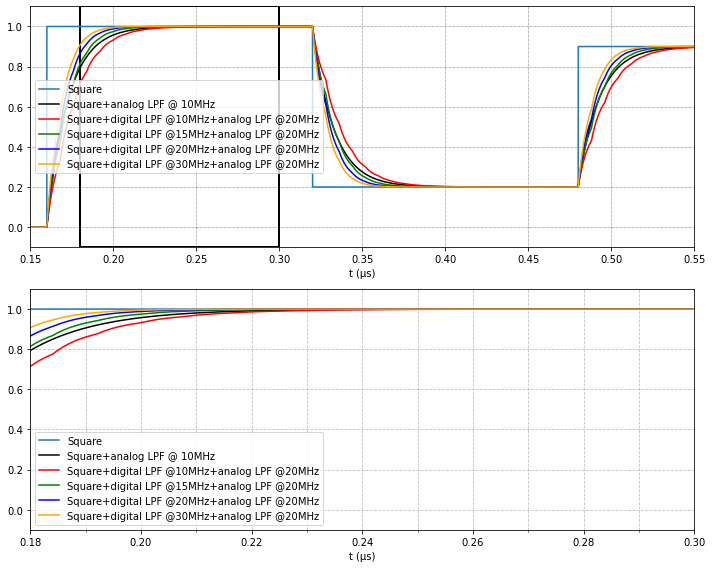

In [209]:
compare_plot3(sig, a_analog_20MHz, a_digit_10MHz, a_digit_15MHz, a_digit_20MHz, a_digit_30MHz, \
              '@20MHz', '@10MHz', '@15MHz', '@20MHz', '@30MHz')
plt.savefig('impact_of_dig_filter_analog_filter@20MHz.jpg', dpi=120, bbox_inches='tight')

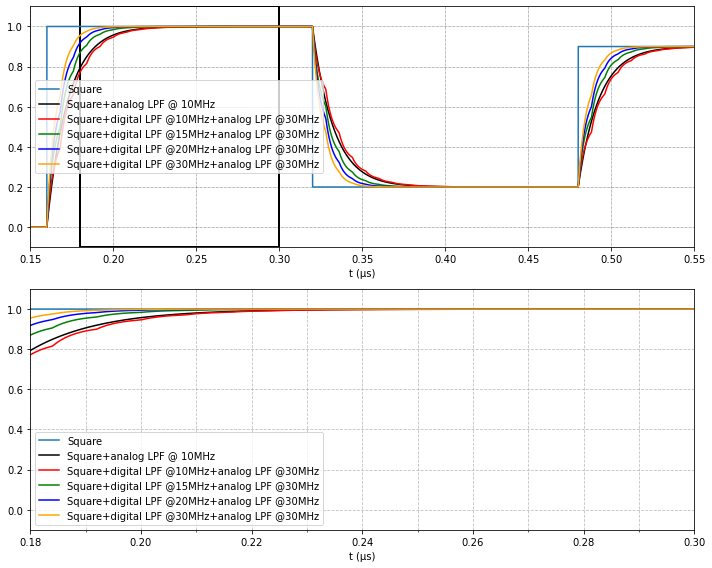

In [210]:
compare_plot3(sig, a_analog_30MHz, a_digit_10MHz, a_digit_15MHz, a_digit_20MHz, a_digit_30MHz, \
              '@30MHz', '@10MHz', '@15MHz', '@20MHz', '@30MHz')
plt.savefig('impact_of_dig_filter_analog_filter@30MHz.jpg', dpi=120, bbox_inches='tight')

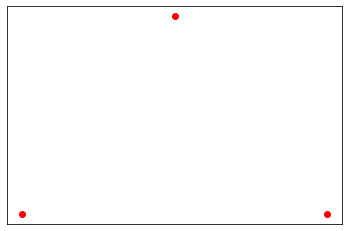

In [211]:
nval=3
r=20
tdm5=np.zeros(nval)
tdm5[1]=1

fig, ax = plt.subplots(figsize=(6, 4))
#ax.plot(tdm5, color='r', marker='o')
ax.plot(tdm5, 'o', color='r')
ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(xticklabels=[])  # remove the tick labels
ax.tick_params(bottom=False)  # remove the ticks


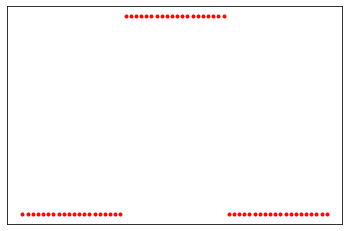

In [212]:
tdm100=np.zeros(nval*r)
for i in range(nval):
    tdm100[i*r:(i+1)*r]=tdm5[i]

fig, ax = plt.subplots(figsize=(6, 4))
#ax.plot(tdm100, color='r', marker='o')
ax.plot(tdm100, '.', color='r')
ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(xticklabels=[])  # remove the tick labels
ax.tick_params(bottom=False)  # remove the ticks


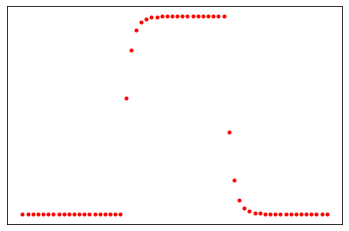

In [213]:
tdm_dlpf=apply_filter(tdm100,a_digit_15MHz)

fig, ax = plt.subplots(figsize=(6, 4))
#ax.plot(tdm_dlpf, color='r', marker='o')
ax.plot(tdm_dlpf, '.', color='r')
ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(xticklabels=[])  # remove the tick labels
ax.tick_params(bottom=False)  # remove the ticks


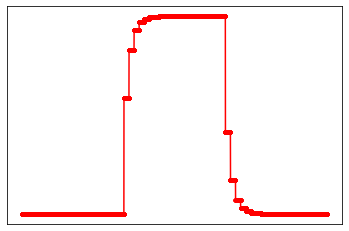

In [214]:
tdm_dac=switch2analog(tdm_dlpf,1000)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(tdm_dac, color='r', marker='.')
#ax.plot(tdm_dac, '.', color='r')
ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(xticklabels=[])  # remove the tick labels
ax.tick_params(bottom=False)  # remove the ticks


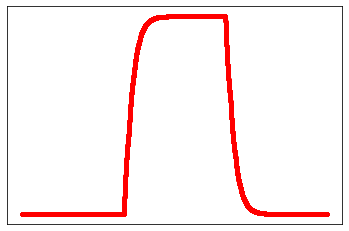

In [215]:
tdm_out=apply_filter(tdm_dac,a_analog_20MHz)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(tdm_out, color='r', marker='.')
ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(xticklabels=[])  # remove the tick labels
ax.tick_params(bottom=False)  # remove the ticks


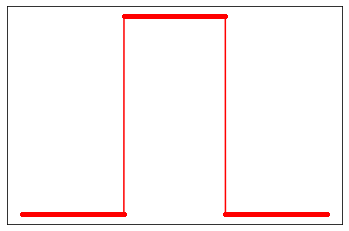

In [216]:
tdm_DAC5MHz=switch2analog(tdm5,20*1000)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(tdm_DAC5MHz, color='r', marker='.')
#ax.plot(tdm_DAC5MHz, '.', color='r')
ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(xticklabels=[])  # remove the tick labels
ax.tick_params(bottom=False)  # remove the ticks


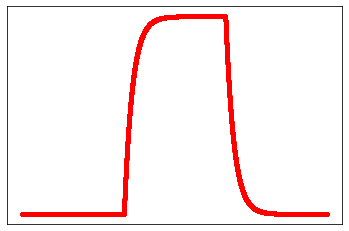

In [217]:
a_analog_10MHz=0.99937
tdm_out2=apply_filter(tdm_DAC5MHz,a_analog_10MHz)

fig, ax = plt.subplots(figsize=(6, 4))
#ax.plot(tdm_out2, color='r', marker='.')
ax.plot(tdm_out2, '.', color='r')
ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(xticklabels=[])  # remove the tick labels
ax.tick_params(bottom=False)  # remove the ticks

